In [2]:
# Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Load the file
movie=pd.read_csv("C:/Users/kfeng3/Desktop/cleaneddatafinal2.csv")
movie.head()

,release_date,title,original_language,popularity,production_companies,production_countries,adjbudget,adjrevenue,runtime,spoken_languages,vote_average,vote_count,genres
0,9/4/1916,Intolerance,1,0,0,1,4.163937e+05,9.057936e+06,197,1,7.4,60,8
1,1/10/1927,Metropolis,0,1,1,0,9.104546e+07,6.393648e+05,153,0,8.0,657,8
2,1/30/1929,Pandora's Box,0,0,0,0,1.500000e+07,2.036248e+07,109,0,7.6,45,8
3,2/8/1929,The Broadway Melody,1,0,0,1,3.790000e+05,4.358000e+06,100,1,5.0,19,8
4,11/15/1930,Hell's Angels,1,0,0,1,3.859150e+06,7.816000e+06,127,0,6.1,19,10


In [4]:
#Rescaling the Data
movie["genres"]=((movie["genres"]-movie["genres"].min())/(movie["genres"].max()-movie["genres"].min()))*1
movie["adjbudget"]=((movie["adjbudget"]-movie["adjbudget"].min())/(movie["adjbudget"].max()-movie["adjbudget"].min()))*1
movie["adjrevenue"]=((movie["adjrevenue"]-movie["adjrevenue"].min())/(movie["adjrevenue"].max()-movie["adjrevenue"].min()))*1
movie["runtime"]=((movie["runtime"]-movie["runtime"].min())/(movie["runtime"].max()-movie["runtime"].min()))*1
movie["vote_average"]=((movie["vote_average"]-movie["vote_average"].min())/(movie["vote_average"].max()-movie["vote_average"].min()))*1
movie["vote_count"]=((movie["vote_count"]-movie["vote_count"].min())/(movie["vote_count"].max()-movie["vote_count"].min()))*1

In [5]:
#Print standardized data
movie.head()

,release_date,title,original_language,popularity,production_companies,production_countries,adjbudget,adjrevenue,runtime,spoken_languages,vote_average,vote_count,genres
0,9/4/1916,Intolerance,1,0,0,1,0.001035,0.003258,0.564815,1,0.711111,0.004291,0.466667
1,1/10/1927,Metropolis,0,1,1,0,0.232143,0.000227,0.429012,0,0.777778,0.047706,0.466667
2,1/30/1929,Pandora's Box,0,0,0,0,0.038224,0.007329,0.293210,0,0.733333,0.003200,0.466667
3,2/8/1929,The Broadway Melody,1,0,0,1,0.000939,0.001566,0.265432,1,0.444444,0.001309,0.466667
4,11/15/1930,Hell's Angels,1,0,0,1,0.009814,0.002811,0.348765,0,0.566667,0.001309,0.600000


In [6]:
#Data Exploration: Hierachical Clustering 

#Before kmeans, dropping the non-relevant strings 
movie1=movie.drop(columns=["release_date", "title"])
movie1.head()

,original_language,popularity,production_companies,production_countries,adjbudget,adjrevenue,runtime,spoken_languages,vote_average,vote_count,genres
0,1,0,0,1,0.001035,0.003258,0.564815,1,0.711111,0.004291,0.466667
1,0,1,1,0,0.232143,0.000227,0.429012,0,0.777778,0.047706,0.466667
2,0,0,0,0,0.038224,0.007329,0.293210,0,0.733333,0.003200,0.466667
3,1,0,0,1,0.000939,0.001566,0.265432,1,0.444444,0.001309,0.466667
4,1,0,0,1,0.009814,0.002811,0.348765,0,0.566667,0.001309,0.600000


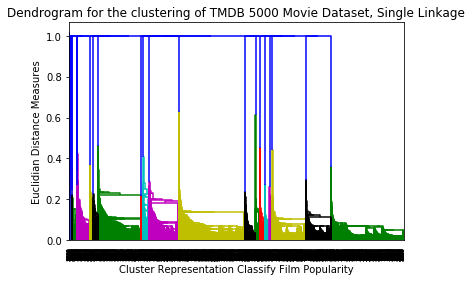

In [7]:
#Hierachical Clustering 
#Single Linkage 
hsclusters = sch.linkage(movie1, method = "single")
dendrogram = sch.dendrogram(hsclusters)
plt.title("Dendrogram for the clustering of TMDB 5000 Movie Dataset, Single Linkage")
plt.xlabel("Cluster Representation Classify Film Popularity")
plt.ylabel("Euclidian Distance Measures");
plt.show()

In [13]:
y1 = hsclusters.fit_predict(movie1)

AttributeError: 'numpy.ndarray' object has no attribute 'fit_predict'

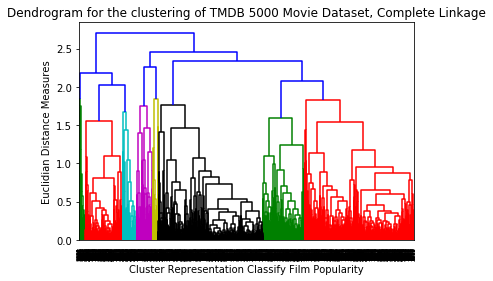

In [8]:
#Complete Linkage 
hcclusters = sch.linkage(movie1, method = "complete")
dendrogram = sch.dendrogram(hcclusters)
plt.title("Dendrogram for the clustering of TMDB 5000 Movie Dataset, Complete Linkage")
plt.xlabel("Cluster Representation Classify Film Popularity")
plt.ylabel("Euclidian Distance Measures");
plt.show()